In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

#http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Brain2BodyWeight
full_df=pd.read_csv('brain-weight.csv', sep=',',header=None)
print(full_df)

                       0         1         2         3
0          Newborn_Human      3.20  0.374985  0.117183
1            Adult_Human     73.00  1.349982  0.018493
2    Pithecanthropus_Man     70.00  0.925011  0.013214
3               Squirrel      0.80  0.007620  0.009525
4                Hamster      0.15  0.001406  0.009374
5             Chimpanzee     50.00  0.419981  0.008400
6                 Rabbit      1.40  0.011521  0.008229
7           Dog_(Beagle)     10.00  0.071985  0.007199
8                    Cat      4.50  0.029982  0.006663
9                    Rat      0.40  0.001996  0.004990
10  Bottle-Nosed_Dolphin    400.00  1.499985  0.003750
11                Beaver     24.00  0.044996  0.001875
12               Gorilla    320.00  0.502490  0.001570
13                 Tiger    170.00  0.263492  0.001550
14                   Owl      1.50  0.002223  0.001482
15                 Camel    550.00  0.761990  0.001385
16              Elephant   4600.00  5.999984  0.001304
17        

    
    Read in the data from the file using pandas 
    pd.read_csv(file path, seperator, header)
    We want to write a function so that we can play around with different data inputs

In [14]:
# we will use scikit learns linear_model to do linear regression
def fit_and_graph(df, index):
    # for simplicity lets remove the extra columns 0,3 and keep the x,y  we want 1,2
    df = full_df[full_df.columns.difference([0,3])]  
    # toss out lines 16 and 24 .. elephent and sperm whale, they are outliers

    
    # scikit wants the values in rows instead of columns so we pivot the matrix using df.values.reshape(col,row)
    # should break this up so its not so confusing
    x = df[1].values.reshape(len(df[1]), 1)
    y = df[2].values.reshape(len(df[2]), 1)


    modeler = LinearRegression()

    fit = modeler.fit(x,y)
    prediction = modeler.predict(x)

    #if we dont call out the figure index, we will just graph ontop of each other
    plt.figure(index)
    plt.scatter(x, prediction)
    plt.xlabel("Weight")
    plt.ylabel("Brain Size")
    plt.title("Weight Vs Vrain Size")
    
    #ploit the fit
    plt.plot(x, prediction, color='k')
    
    return x, y, fit, prediction

    Now we can call our function and get back all the relevant data

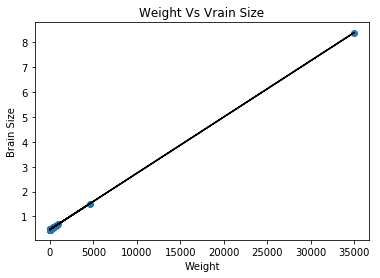

In [15]:
x, y, fit, prediction = fit_and_graph(full_df, 1)

    This is pretty useless due to the sperm whale messing everything up
    seems to work a lot better without the huge animals
    but how good is it really?
    lets checkout of the mean squares error (MSE)

In [16]:
mse = np.mean((x - prediction)**2)
print(mse)

46241366.1752


low MSE is best, but its also relative.. so lets see if we can improve it
lets toss out the elephant and whale and see if it works better

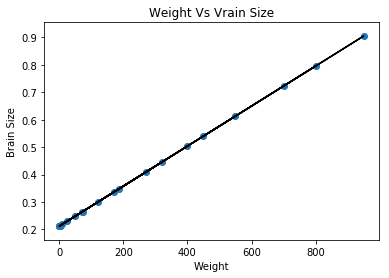

In [17]:
full_df=pd.read_csv('brain-weight.csv', sep=',',header=None)
full_df.drop([16,24], inplace=True)
x, y, fit, prediction = fit_and_graph(full_df,2)

    seems to work a lot better without the huge animals
    but how good is it really?
    lets checkout of the mean squares error (MSE)


In [18]:
mse = np.mean((x - prediction)**2)
print(mse)

118320.381113


    since the MSE dropped considerably, it seems we improved the model by tossing the elephant and whale
    however we should be training our model, luckily scikit provides a tool for this
    it is important that its random so that we dont accidently introduce bias into our data

In [19]:
xtrain, xtest, ytrain, ytest = sk.model_selection.train_test_split(x, y, test_size=.25)

    this is a small dataset so we may not notice any improvement

In [20]:
modeler = LinearRegression()
modeler.fit(xtrain,ytrain)
print('xtr', xtrain.shape)
print('xts', xtest.shape)

print('ytr', ytrain.shape)
print('yts', ytest.shape)

prediction_train = modeler.predict(xtrain)
print('xprd', prediction_train.shape)
prediction_test = modeler.predict(xtest)
print('xtst', prediction_train.shape)

xtr (18, 1)
xts (7, 1)
ytr (18, 1)
yts (7, 1)
xprd (18, 1)
xtst (18, 1)


In [21]:
mse_train = np.mean((ytrain - prediction_train)**2)
print(mse_train)

0.0266161497772


In [22]:
mse_test = np.mean((ytest - prediction_test)**2)
print(mse)

118320.381113


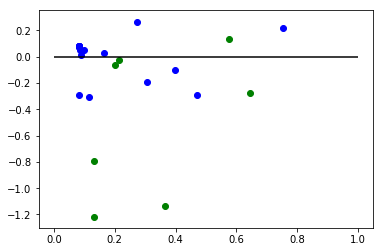

In [23]:
plt.scatter(prediction_train, prediction_train - ytrain, c='b')
plt.scatter(prediction_test, prediction_test - ytest, c='g')
plt.hlines(y=0,xmin=0, xmax=1)

    its hard to tell because there isnt much data, but the idea behind this step is to check if there is any underlying structure to our data that we may have missed while explaining our model. 
    we need to have a pretty random scatter to feel good about our model